In [2]:
# import libraries
import numpy as np
import pysindy as ps
from matplotlib import pyplot as plt
from scipy.signal import StateSpace, lsim, dlsim
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error

In [2]:
# Define the state space model parameters
Amplitude = 600
Amplitude1 = 600
Frequency = 19000  # injector frequency
RunTime = .004
SampleTime = 1e-7 
L1 = 8.0141e-7 # H
L2 = 2.0462e-6 # H
M = .161 * L2  # Coupling coefficient
Mw = .1346 * L2  # Coupling coefficient
Cap = 96e-6  # F
R1 = .0025  # Ohm
R2 = .005  # Ohm
R3 = .005  # Ohm
dT = 1e-7
PhaseAngle1 = 90
PhaseAngle2 = 180
PhaseAngle3 = 270

# Scale factor in front of the entries to the A matrix 
# that are affected by mutual inductance
scalar1 = 1 / ((L2 - Mw) * ( (L2 ** 2) - (4 * M ** 2)  +  2 *L2 * Mw +  (Mw ** 2) ))
x3a =  (-L2 ** 2) * R2 + (2 * M ** 2) * R2 -L2 * Mw * R2
x3b = (-L2 ** 2) + (2 * M ** 2)-L2 * Mw
x3c = (L2 ** 2) * R2 - (2 * M ** 2) * R2 + L2 * Mw * R2 + (L2 ** 2) * R3 - (2 * M ** 2) * R3 + L2 * Mw * R3
x3d = L2 * M * R2 - M * Mw * R2
x3e = L2 * M- M * Mw
x3f = -L2 * M * R2 + M * Mw * R2 -L2 * M * R3 + M * Mw * R3
x3g = L2 * M * R2 - M * Mw * R2
x3h = L2 * M- M * Mw
x3i = -L2 * M * R2 + M * Mw * R2 -L2 * M * R3 + M * Mw * R3
x3j = - 2 * (M ** 2) * R2 + L2 * Mw * R2 + (Mw ** 2) * R2
x3k = - 2 * (M ** 2) + L2 * Mw + Mw ** 2
x3l = 2 * (M ** 2) * R2 -L2 * Mw * R2 - (Mw ** 2) * R2 + 2 * R3 * (M ** 2)-L2 * Mw * R3 - R3 * Mw ** 2

# Entries for x6 in A matrix
x6a = -L2 * M * R2 + M * Mw * R2
x6b = -L2 * M + M * Mw
x6c = L2 * M * R2 - M * Mw * R2 + L2 * M * R3 - M * Mw * R3
x6d = R2 * (L2 ** 2)- 2 * R2 * (M ** 2) + L2 * Mw * R2
x6e = (L2 ** 2)- 2 * (M ** 2) + L2 * Mw
x6f = - R2 * (L2 ** 2) + 2 * R2 * (M ** 2)-L2 * Mw * R2 - R3 * (L2 ** 2) + 2 * R3 * (M ** 2)-L2 * Mw * R3
x6g = 2 * R2 * (M ** 2)-L2 * Mw * R2 - R2 * (Mw ** 2)
x6h = 2 * (M ** 2)-L2 * Mw- (Mw ** 2)
x6i = - 2 * R2 * (M ** 2) + L2 * Mw * R2 + R2 * (Mw ** 2)- 2 * R3 * (M ** 2) + L2 * Mw * R3 + R3 * (Mw ** 2)
x6j = -L2 * M * R2 + M * Mw * R2
x6k = -L2 * M + M * Mw
x6l = L2 * M * R2 - M * Mw * R2 + L2 * M * R3 - M * Mw * R3

# Entries for x9 in A matrix
x9a = -L2 * M * R2  +  M * Mw * R2
x9b = -L2 * M  +  M * Mw
x9c = L2 * M * R2 - M * Mw * R2 *  +  L2 * M * R3  - M * Mw * R3
x9d = 2 * (M ** 2) * R2 - L2 * Mw * R2 - (Mw ** 2) * R2
x9e = 2 * (M ** 2) - L2 * Mw - (Mw ** 2)
x9f = - 2 * (M ** 2) * R2 +  L2 * Mw * R2  +  (Mw ** 2) * R2 - 2 * (M ** 2) * R3  +  L2 * Mw * R3  +  (Mw ** 2) * R3
x9g =(L2 ** 2) * R2 - 2 * (M ** 2) * R2  +  L2 * Mw * R2
x9h = (L2 ** 2) - 2 * (M ** 2)  +  L2 * Mw
x9i = - (L2 ** 2) * R2  +  2 * (M ** 2) * R2 - L2 * Mw * R2 - (L2 ** 2) * R3  +  2 * (M ** 2) * R3 - L2 * Mw * R3
x9j = -L2 * M * R2  +  M * Mw * R2
x9k = -L2 * M  +  M * Mw 
x9l = L2 * M * R2 - M * Mw * R2  +  L2 * M * R3 - M * Mw * R3

#Entries for x12 in A matrix
x12a = - 2 * (M ** 2) * R2 +  L2 * Mw * R2  + (Mw ** 2) * R2
x12b = - 2 * (M ** 2)  +  L2 * Mw  +  (Mw ** 2)
x12c = 2 * (M ** 2) * R2 - L2 * Mw * R2 - (Mw ** 2) * R2  +  2 * (M ** 2) * R3 - L2 * Mw * R3 - (Mw ** 2) * R3
x12d = L2 * M * R2 - M * Mw * R2
x12e = L2 * M - M * Mw
x12f = -L2 * M * R2  +  M * Mw * R2 - L2 * M * R3  +  M * Mw * R3
x12g = L2 * M * R2 - M * Mw * R2
x12h = L2 * M - M * Mw
x12i = -L2 * M * R2  +  M * Mw * R2 - L2 * M * R3  +  M * Mw * R3
x12j = (-L2 ** 2) * R2  +  2 * (M ** 2) * R2 - L2 * Mw * R2
x12k = (-L2 ** 2)  +  2 * (M ** 2) - L2 * Mw
x12l = (L2 ** 2) * R2 - 2 * (M ** 2) * R2  +  L2 * Mw * R2  +  (L2 ** 2) * R3 - 2 * (M ** 2) * R3  +  L2 * Mw * R3

In [3]:
A = np.array([[((-1 / L1) * (R1 + R2)), -1 / L1, R2 / L1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
     [1 / Cap, 0, -1 / Cap, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
     [-scalar1 * x3a, -scalar1 * x3b,-scalar1 * x3c, -scalar1 * x3d, 
      -scalar1 * x3e, -scalar1 * x3f, -scalar1 * x3g, -scalar1 * x3h, 
      -scalar1 * x3i, -scalar1 * x3j, -scalar1 * x3k, -scalar1 * x3l],
     [0, 0, 0, ((-1 / L1)*(R1 + R2)), -1 / L1, R2*1 / L1, 0, 0, 0, 0, 0, 0], 
     [0, 0, 0,  1 / Cap, 0, -1 / Cap, 0, 0, 0, 0, 0, 0], 
     [scalar1 * x6a, scalar1 * x6b, scalar1 * x6c, scalar1 * x6d, 
      scalar1 * x6e, scalar1 * x6f, scalar1 * x6g, scalar1 * x6h, 
      scalar1 * x6i, scalar1 * x6j, scalar1 * x6k, scalar1 * x6l],
     [0, 0, 0, 0, 0, 0, ((-1 / L1) * (R1 + R2)), -1 / L1, R2 / L1, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0, 1 / Cap, 0, -1 / Cap, 0, 0, 0], 
     [scalar1 * x9a, scalar1 * x9b, scalar1 * x9c, scalar1 * x9d, 
      scalar1 * x9e, scalar1 * x9f, scalar1 * x9g, scalar1 * x9h, 
      scalar1 * x9i, scalar1 * x9j, scalar1 * x9k, scalar1 * x9l], 
     [0, 0, 0, 0, 0, 0, 0, 0, 0, ((-1 / L1) * (R1 + R2)), -1 / L1, R2 / L1], 
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1 / Cap, 0, -1 / Cap], 
     [-scalar1 * x12a, -scalar1 * x12b, -scalar1 * x12c, -scalar1 * x12d,
      -scalar1 * x12e, -scalar1 * x12f, -scalar1 * x12g, -scalar1 * x12h, 
      -scalar1 * x12i, -scalar1 * x12j, -scalar1 * x12k, -scalar1 * x12l]]
)

B = np.array(
    [[1 / L1, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 1 / L1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 1 / L1, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 1 / L1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]]
)

C = np.array(
    [[0,0,1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
)

D = np.zeros((C.shape[0], C.shape[0]))

In [4]:
sysc = StateSpace(A, B, C, D) 

In [5]:
sysc.A.shape

(12, 12)

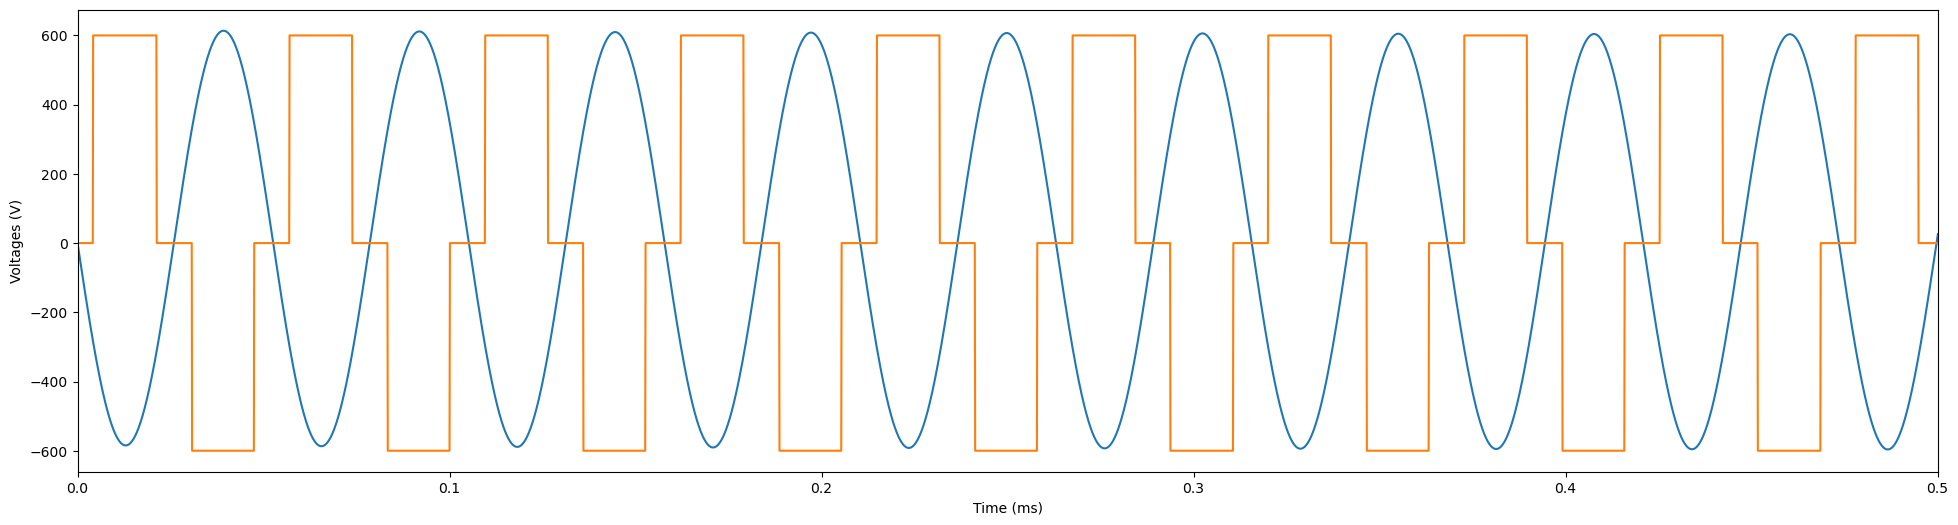

In [6]:
time = np.linspace(0, RunTime, int(RunTime / SampleTime) + 1, endpoint=True)
data = loadmat('voltages.mat')
voltage1 = data['voltage']
voltage2 = data['newVoltageShift1']
voltage3 = data['newVoltageShift2']
voltage4 = data['newVoltageShift3']
plt.figure(figsize=(24, 6))
plt.plot(time * 1e3, voltage1)
# plt.show()
# plt.figure(figsize=(24, 6))
plt.plot(time * 1e3, voltage3)
plt.xlim(0, 0.5)
plt.xlabel('Time (ms)')
plt.ylabel('Voltages (V)')
plt.show()

In [7]:
tout, yout, xout = lsim(sysc, np.hstack([voltage1, voltage2, voltage3, voltage4]), time)

In [8]:
# type(tout)
print(tout.shape, yout.shape, xout.shape)

(40001,) (40001, 4) (40001, 12)


In [9]:
# Add some noise proportional to the signal with the smallest amplitude of the 12
rmse = mean_squared_error(xout[:, 1], np.zeros(xout[:, 1].shape), squared=False)
xout = xout + np.random.normal(0, rmse / 100.0 * 0.1, xout.shape)  # add modest 0.1% noise

In [10]:
xout.shape

(40001, 12)

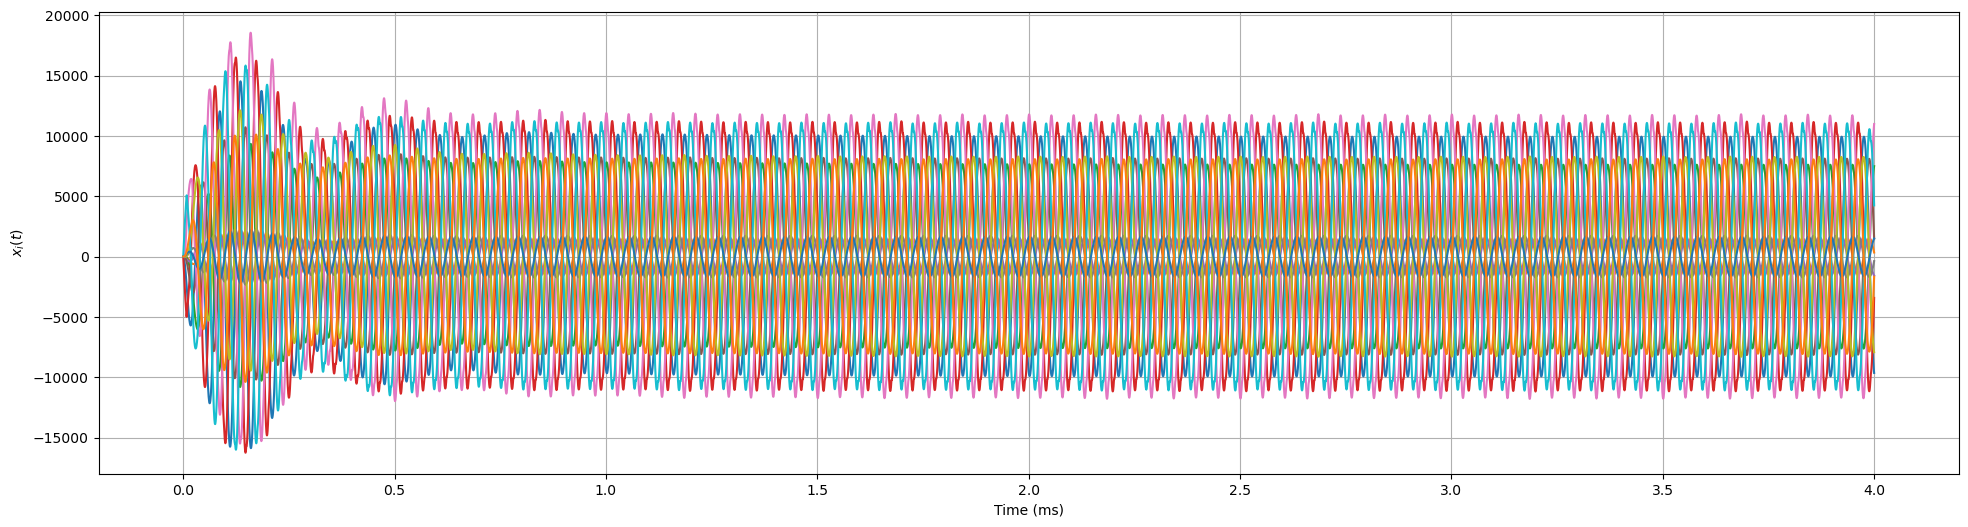

In [12]:
# Could consider rescaling units here
# xout = xout
# yout = yout
# tout = tout 
# dt = tout[1] - tout[0]
plt.figure(figsize=(24, 6))
for i in range(12):
    plt.plot(tout * 1000, xout[:, i])
plt.grid(True)
plt.xlabel('Time (ms)')
plt.ylabel(r'$x_i(t)$')
plt.show()

---

In [13]:
u = np.hstack([voltage1, voltage2, voltage3, voltage4])

In [14]:
u.shape

(40001, 4)

In [16]:
sindy_library = ps.PolynomialLibrary(degree=1, include_bias=False)
optimizer_stable = ps.StableLinearSR3(
    threshold=0.0,
    thresholder='l1',
    nu=1e-5,
    max_iter=1000,
    tol=1e-5,
    verbose=True,
)

In [17]:
model = ps.SINDy(feature_library=sindy_library, optimizer=optimizer_stable)
model.fit(xout, t=tout, u=u)

 Iteration ... |y - Xw|^2 ...  |w-u|^2/v ...       R(u) ... Total Error: |y - Xw|^2 + |w - u|^2 / v + R(u)
         0 ... 2.9952e+25 ... 1.7625e+18 ... 0.0000e+00 ... 2.9952e+25
       100 ... 2.9200e+25 ... 1.5367e+18 ... 0.0000e+00 ... 2.9200e+25
       200 ... 2.9200e+25 ... 1.5367e+18 ... 0.0000e+00 ... 2.9200e+25
       300 ... 2.9200e+25 ... 1.5367e+18 ... 0.0000e+00 ... 2.9200e+25
       400 ... 2.9200e+25 ... 1.5367e+18 ... 0.0000e+00 ... 2.9200e+25
       500 ... 2.9200e+25 ... 1.5367e+18 ... 0.0000e+00 ... 2.9200e+25
       600 ... 2.9200e+25 ... 1.5367e+18 ... 0.0000e+00 ... 2.9200e+25
       700 ... 2.9200e+25 ... 1.5367e+18 ... 0.0000e+00 ... 2.9200e+25
       800 ... 2.9200e+25 ... 1.5367e+18 ... 0.0000e+00 ... 2.9200e+25
       900 ... 2.9200e+25 ... 1.5367e+18 ... 0.0000e+00 ... 2.9200e+25


C:\Users\adity\AppData\Roaming\Python\Python310\site-packages\pysindy\optimizers\stable_linear_sr3.py:431: ConvergenceWarning: StableLinearSR3._reduce did not converge after 1000 iterations.
  warnings.warn(


SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=1, include_bias=False),
      feature_names=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
                     'x10', 'x11', 'u0', 'u1', 'u2', 'u3'],
      optimizer=StableLinearSR3(max_iter=1000, nu=1e-05, threshold=0.0,
                                verbose=True))

In [20]:
model.feature_library

PolynomialLibrary(degree=1, include_bias=False)

In [13]:
Xi = model.coefficients()

In [18]:
Xi.shape

(12, 16)

In [14]:
r = Xi.shape[0]
B_SINDy = Xi[:r, r:]
A_SINDy = Xi[:r, :r]

In [15]:
B_SINDy

array([[ 1.25131256e+06,  1.02034863e+03,  1.80536007e+03,
         7.85329704e+02],
       [ 4.57595256e+02, -1.87751320e+03, -1.43695246e+01,
        -1.78032513e+03],
       [-2.43242750e+03, -7.59480754e+02, -6.29580952e+02,
        -6.12055574e+02],
       [ 3.42623981e+04,  9.76877839e+05, -3.65659972e+03,
        -2.34553870e+05],
       [ 4.72349144e+02, -1.04095066e+01, -1.94249331e+02,
         5.66994868e+01],
       [ 2.76023559e+03,  2.85394163e+02,  9.97709214e+01,
         3.88840029e+02],
       [ 7.77603403e+04, -1.57722106e+03,  1.19707791e+06,
         8.05682123e+02],
       [-3.84777711e+02,  7.12580376e+02,  7.86704804e+01,
         5.77751430e+02],
       [ 4.68719020e+02,  1.86019228e+03, -8.18951577e+02,
         2.01643993e+03],
       [ 7.55848820e+02, -2.32900737e+05,  1.58334811e+03,
         9.77702032e+05],
       [ 6.87713139e+02, -9.60210900e+02, -4.95582101e+00,
        -8.73103654e+02],
       [ 1.08623579e+03,  1.65241699e+03,  5.22420550e+02,
      

In [11]:
num = 1
N = 1000
N_drop = 500
r0 = 3.5
vs=2+np.random.random(size=(1,N+N_drop))
xss = []
uss=[]
for v in vs:
    r= r0 + 1/v
    xs = []
    x = 0.5
    for n in range(N + N_drop):
        if n >= N_drop:
            xs = xs + [x]
        x = r[n] * x * (1 - x)
    xss = xss + [np.array(xs)]
    uss=uss+[v[N_drop:]]

uss.append(0.25*xss[0])

# print(xss)
# print(uss)

feature_lib = ps.PolynomialLibrary(degree=2, include_bias=True)
parameter_lib = ps.CustomLibrary(library_functions=[lambda x:1/x], function_names=[lambda x:x+'^-1'],include_bias=True)
lib = ps.ParameterizedLibrary(
    feature_library=feature_lib,
    parameter_library=parameter_lib,
    num_features=2,
    num_parameters=1,
)
opt = ps.STLSQ(threshold=1e-3, normalize_columns=False)
model = ps.SINDy(
    feature_library=lib, optimizer=opt, feature_names=["x", "v", "u"], discrete_time=True
)
model.fit(np.stack(xss, -1), u=np.stack(uss, -1))
model.print()

(x)[k+1] = 0.008 1 1 + 0.226 1 x[k] + -0.004 1 v[k] + -3.911 1 x[k]^2 + 0.031 1 x[k] v[k] + 0.004 1 v[k]^2 + 0.003 u[k]^-1 1 + 0.033 u[k]^-1 x[k] + -0.003 u[k]^-1 v[k] + 0.903 u[k]^-1 x[k]^2 + -0.016 u[k]^-1 x[k] v[k] + 0.001 u[k]^-1 v[k]^2


In [3]:
np.array(xss).shape

(1, 1000)

In [4]:
np.array(uss).shape

(1, 1000)